In [ ]:
import sys
sys.path.append('../../')

In [1]:
import pandas as pd

In [ ]:
filtered_scores = pd.read_csv('./DMS/Surveillance/filtered_mutations_first_haplotype_sequences.csv',index_col=0)

In [3]:
filtered_scores = pd.merge(filtered_scores,pd.DataFrame(filtered_scores.value_counts(['position'])).reset_index(),left_on='position',right_on='position')
filtered_scores

,label,semantic_score,relative_grammaticality,relative_sequence_grammaticality,relative_mutated_grammaticality,relative_masked_grammaticality,grammaticality,sequence_grammaticality,mutated_grammaticality,masked_grammaticality,...,reference_amino_acid_property_basic,reference_amino_acid_property_complex,mutant_amino_acid_property_basic,mutant_amino_acid_property_complex,Accessibility WCN,Dissimilarity Charge Hydro,relative_grammaticality_with_eve,ESM-1b Relative Grammaticality with EVE,counts,count
0,L5F,0.484245,-4.556292,-0.438385,-0.098429,-1.661515,-4.577598,-430.55222,-0.119735,-1.682820,...,nonpolar/hydrophobic,aliphatic,nonpolar/hydrophobic,aromatic,-1.736454,-2.014505,-2.248552,-2.408200,277873.0,1
1,P9L,2.306176,-4.881130,-2.634521,-0.063380,-4.191641,-5.198579,-432.74835,-0.380829,-4.509090,...,nonpolar/hydrophobic,aliphatic,nonpolar/hydrophobic,aliphatic,-1.736454,-1.056489,-2.083040,-2.626508,7612.0,1
2,S12F,1.109450,-3.033943,0.360168,0.066236,-1.675808,-3.272445,-429.75366,-0.172266,-1.914310,...,polar/neutral,hydroxylic,nonpolar/hydrophobic,aromatic,-1.736454,-0.559057,-1.874129,-2.035886,20685.0,1
3,S13I,1.701488,-9.799476,-1.761871,-0.699874,-6.715177,-9.833577,-431.87570,-0.733976,-6.749278,...,polar/neutral,hydroxylic,nonpolar/hydrophobic,aliphatic,-1.736454,-0.337976,-2.398776,-3.079963,122954.0,1
4,L18F,0.443012,-3.249498,0.338593,0.059239,-1.868802,-3.464392,-429.77524,-0.155655,-2.083696,...,nonpolar/hydrophobic,aliphatic,nonpolar/hydrophobic,aromatic,-1.437472,-2.014505,-1.857420,-1.959336,271386.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,C1247G,0.616275,-8.360518,-3.469055,-2.908390,-6.752914,-8.424541,-433.58290,-2.972414,-6.816937,...,polar/neutral,sulphur-containing,polar/neutral,aliphatic,-1.736454,-1.940812,-2.550243,-2.781941,24.0,2
342,S1252F,0.471660,-6.508742,-0.653198,-0.929373,-4.246643,-6.640748,-430.76703,-1.061379,-4.378649,...,polar/neutral,hydroxylic,nonpolar/hydrophobic,aromatic,-1.736454,-0.559057,-2.120564,-2.307275,13637.0,1
343,P1263L,0.542450,-3.313677,-0.923065,-0.044136,-2.311999,-3.797243,-431.03690,-0.527701,-2.795564,...,nonpolar/hydrophobic,aliphatic,nonpolar/hydrophobic,aliphatic,-1.736454,-1.056489,-1.979583,-2.094820,17515.0,1
344,V1264L,0.715778,-2.325080,-0.173004,0.320758,-0.976007,-2.938561,-430.28683,-0.292723,-1.589488,...,nonpolar/hydrophobic,aliphatic,nonpolar/hydrophobic,aliphatic,-1.736454,-2.143469,-2.138463,-2.092062,148830.0,1


In [6]:
filtered_scores = filtered_scores[['ref','pos','count']]

<Axes: xlabel='pos', ylabel='count'>

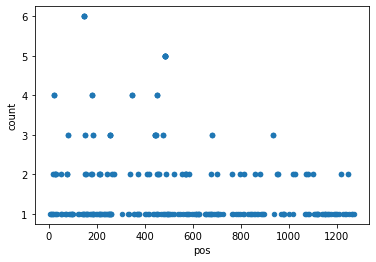

In [8]:
filtered_scores.plot(x='pos',y='count',kind='scatter')

In [5]:
from Bio.PDB import *
def edit_bfactor(input_file,scores,attribute,is_mutations=False,make_positive=False):
    all_mutation_scores = []
    if is_mutations:
        for mutation in scores.mutation.unique():
            mutation_scores = scores[scores.mutation == mutation]
            all_mutation_scores.append(mutation_scores)
    else:
        all_mutation_scores.append(scores)
    for mutation_scores in all_mutation_scores:
        if is_mutations:
            mutation = mutation_scores.mutation.values[0]
        else:
            mutation = 'reference'

        if 'pos' in mutation_scores.columns:
            position_col = 'pos'
        else:
            position_col = 'position'

        lines = []
        with open(input_file, 'r') as file:
            for l in file:
                if 'ATOM' in l:
                    residue_number = int(l[22:26].split()[0])
                    if(len(mutation_scores[mutation_scores[position_col] == residue_number]) == 0):
                        change = 0
                    else:
                        change = float(mutation_scores[mutation_scores[position_col] == residue_number][attribute].values[0])
                    if make_positive:
                        change = abs(change)
                    l = l[:60] + str(round(change,2))[:6] +l[66:]
                lines.append(l)

            output_file = input_file.split('.')[0]+'_'+mutation+'_'+attribute+'_'+input_file.split('.')[1]+'.pdb'
            with open(output_file, 'w') as file:    
                for l in lines:
                    file.write(l)
                    file.write('\n')

In [ ]:
input_file = './PDB/6vsb_1_1_1_6vw1.pdb'

In [12]:
edit_bfactor(input_file,filtered_scores,'count',is_mutations=False,make_positive=False)

color byattribute bfactor palette 0,grey:1,#FEFFB2:2,#FED976:3,#FEB34B:4,#FD8D3C:5,#F03B21:6,#BD0026

In [14]:
command = 'hide atoms;hide /B cartoon;hide /C cartoon;'
hashtag = '#'+str(1)

sites =filtered_scores[filtered_scores['count']>=1].pos.unique().astype(str)
command +='select '+hashtag+'/A:'+','.join(sites)+';show sel surfaces;show sel atoms;'
command +='select subtract sel;set bgColor white;lighting flat;lighting shadows true intensity 0.5;tile;transparency 35 surface;'


In [15]:
command

'hide atoms;hide /B cartoon;hide /C cartoon;select #1/A:5,9,12,13,18,19,20,21,25,26,27,29,31,33,50,51,52,54,67,72,73,75,76,80,83,90,95,96,97,98,102,121,127,138,142,145,146,147,148,152,153,154,156,157,158,162,164,171,176,177,179,181,182,183,184,185,186,190,197,200,209,210,212,213,214,215,216,217,222,231,232,235,240,243,245,246,251,252,253,254,255,256,257,258,261,262,264,272,306,332,337,339,346,354,356,367,368,371,373,375,376,403,405,408,414,417,420,434,440,444,445,446,449,450,451,452,453,455,456,460,470,477,478,481,483,484,486,490,493,494,496,498,501,505,516,521,522,540,547,554,558,570,572,573,574,575,582,583,584,597,604,613,614,615,621,623,626,628,653,654,655,666,670,672,675,677,678,679,681,688,699,701,703,704,705,706,716,726,764,765,769,780,790,796,798,809,812,813,831,839,845,849,856,858,859,870,872,879,883,888,892,899,936,939,950,954,969,976,978,981,982,1003,1017,1020,1027,1070,1071,1073,1079,1081,1084,1101,1107,1111,1115,1117,1118,1121,1124,1139,1143,1150,1151,1153,1160,1165,1168,11